In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
%matplotlib inline
from inference_model import InferenceModel
from ipywidgets import interact, IntSlider

In [44]:
from sir_model import ProximityModel
model = ProximityModel(N=100, scale=1.2, mu=0.01, lamb=0.02)
print("expected number of contacts %.1f" % model.n_contacts)

expected number of contacts 6.6


In [45]:
model.run(200, print_every=20)

Generating transmissions
Running simulation
t = 0 / 200
t = 20 / 200
t = 40 / 200
t = 60 / 200
t = 80 / 200
t = 100 / 200
t = 120 / 200
t = 140 / 200
t = 160 / 200
t = 180 / 200


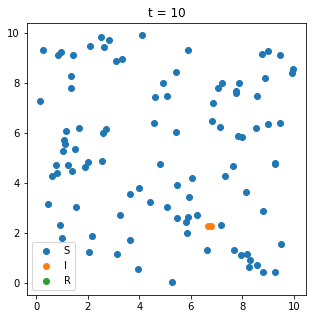

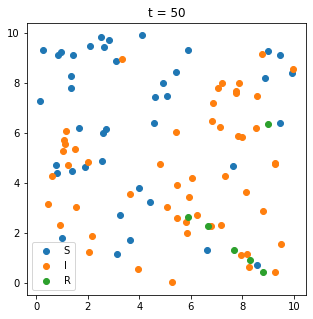

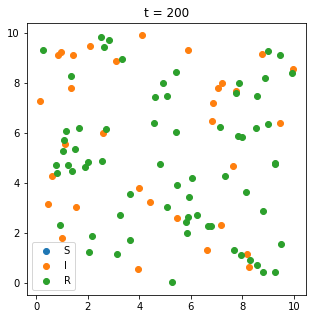

In [46]:
model.plot(t=10)
model.plot(t=50)
model.plot(t=200)

# Inference


In [47]:
import numpy as np
from inference_model import InferenceModel
def generate_initial_probas(M, states):
    freqs = [np.mean(states==s) for s in [0,1,2]]
    print("freqs = ", freqs)
    N = len(states)
    initial_probas = np.broadcast_to(freqs, (N, 3)).copy()
    observations = np.random.choice(N, M, replace=False)
    for i in observations:
        s = int(states[i])
        initial_probas[i] = np.zeros(3)
        initial_probas[i, s] = 1.
    return initial_probas

# we observe M=20 persons at time t_obs=5
t_obs = 5
initial_probas = generate_initial_probas(M=5, states=model.states[t_obs])
infer = InferenceModel(initial_probas, model.x_pos, model.y_pos)
infer.time_evolution(model.recover_probas, model.transmissions[t_obs:], print_every=20)

freqs =  [0.98, 0.02, 0.0]
t = 0 / 195
t = 20 / 195
t = 40 / 195
t = 60 / 195
t = 80 / 195
t = 100 / 195
t = 120 / 195
t = 140 / 195
t = 160 / 195
t = 180 / 195


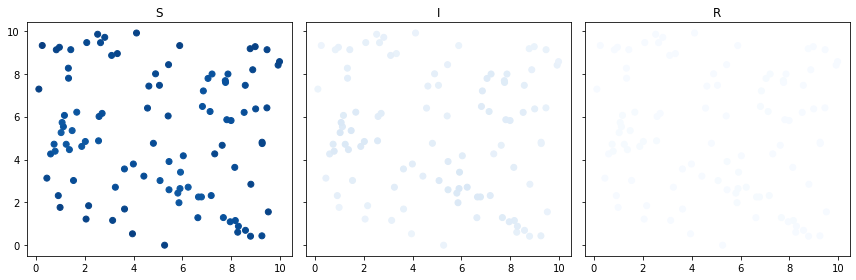

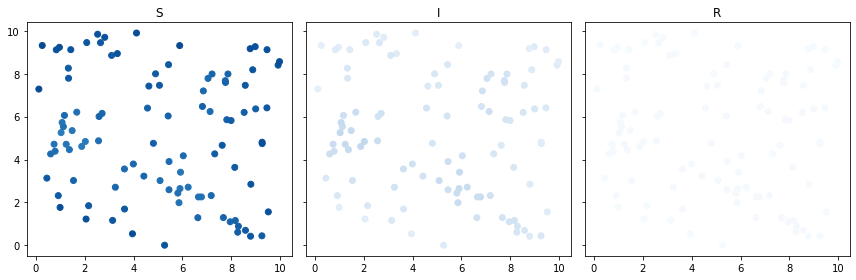

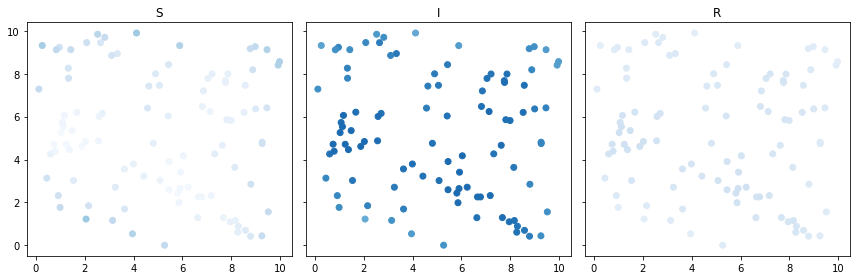

In [48]:
infer.plot_probas(15)
infer.plot_probas(20)
infer.plot_probas(50)

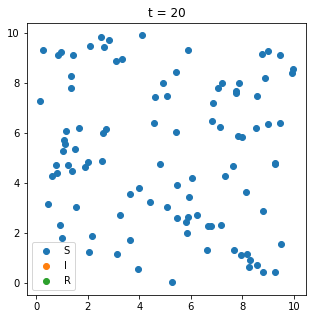

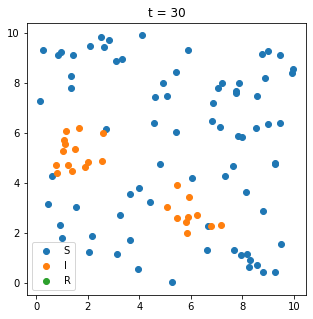

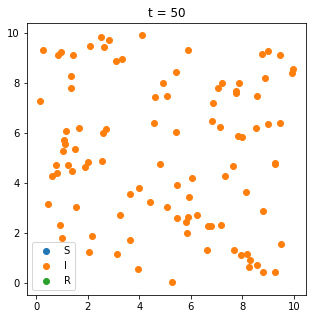

In [49]:
infer.plot_states(20)
infer.plot_states(30)
infer.plot_states(50)

In [50]:
# individual 0, 1, and 5 are found to be infected at time 20 where the estimated delta_t is 5
# assume the probability of infection for individuals from time 15 until time 20 are 1 
# update the probability of all individuals accordingly
infer.update_individual(0, 1, 20 - t_obs, 5, model.recover_probas, model.transmissions[t_obs:], print_every=20)
infer.update_individual(1, 1, 20 - t_obs, 5, model.recover_probas, model.transmissions[t_obs:], print_every=20)
infer.update_individual(5, 1, 20 - t_obs, 5, model.recover_probas, model.transmissions[t_obs:], print_every=20)

t = 20 / 195
t = 40 / 195
t = 60 / 195
t = 80 / 195
t = 100 / 195
t = 120 / 195
t = 140 / 195
t = 160 / 195
t = 180 / 195
t = 20 / 195
t = 40 / 195
t = 60 / 195
t = 80 / 195
t = 100 / 195
t = 120 / 195
t = 140 / 195
t = 160 / 195
t = 180 / 195
t = 20 / 195
t = 40 / 195
t = 60 / 195
t = 80 / 195
t = 100 / 195
t = 120 / 195
t = 140 / 195
t = 160 / 195
t = 180 / 195


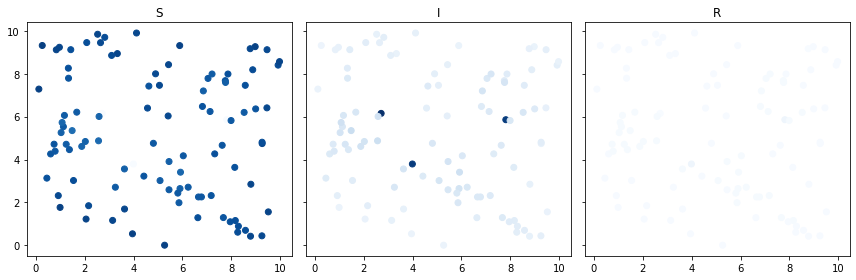

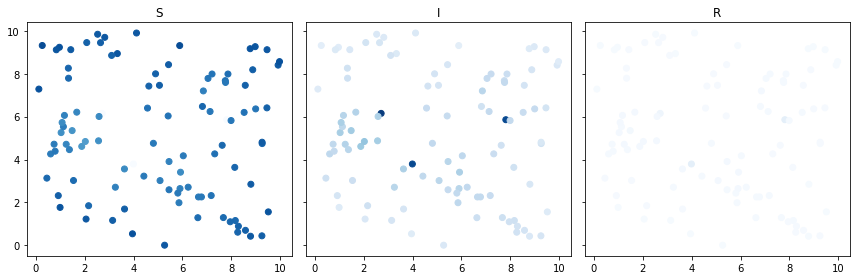

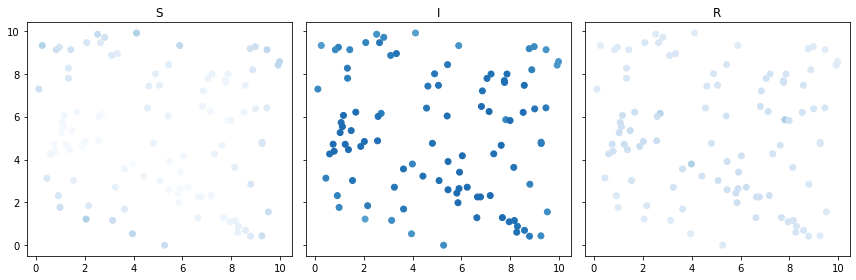

In [51]:
infer.plot_probas(15)
infer.plot_probas(20)
infer.plot_probas(50)

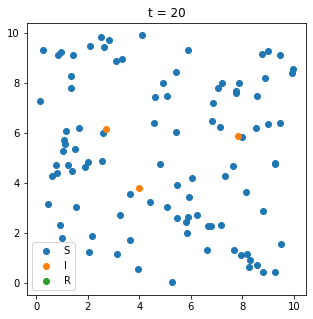

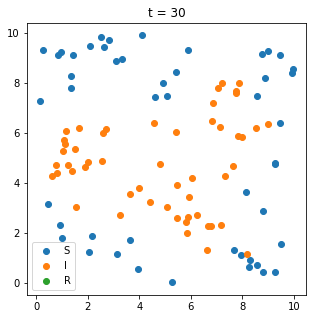

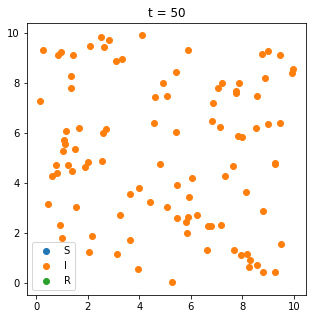

In [52]:
infer.plot_states(20)
infer.plot_states(30)
infer.plot_states(50)